# Linear regression analysis of product rating for different cereals

This notebook contains the analysis of different cereals, investigating the relationships between different product properties (e.g. nutritional value, manufacturer, swrving size and serving condition) and their rating. Building from this general analysis, a linear regression model was created to predict a product rating given different feature values.

<img src="cereal.png" alt="IMG not availiable" width="800" align="center" />

## Notebook and data preperation
### Imports

**Import pandas, numpy, matplotlib,and seaborn, set %matplotlib inline**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Sourcing the Data

The dataset sourced  is a list of 80 cereals, containing the following fields:

* **mfr**: Manufacturer of cereal
A = American Home Food Products
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina
                          
* **type**:
cold
hot
            
* **calories**: calories per serving
           
* **protein**: grams of protein per serving
           
* **fat**: grams of fat per serving
           
* **sodium**: milligrams of sodium
            
* **fiber**: grams of dietary fiber

* **carbs**: grams of complex carbohydrates
           
* **sugars**: grams of sugars

* **potass**: milligrams of potassium
          
* **vitamins**: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
          
* **shelf**: display shelf (1, 2, or 3, counting from the floor)
            
* **weight**: weight in ounces of one serving
            
* **cups**: number of cups in one serving
           
* **rating**: a rating of the cereals (Possibly from Consumer Reports?)


Given the above, general data analysis will be conducted followed by the creation of a linear regression model to predict cereal rating.

**Read in the Cereals csv file as a DataFrame called cereals.**


In [9]:
cereals = pd.read_csv('cereal - cereal.csv')

**Check the head of customers, and check additonal properties using info() and describe() methods.**

In [11]:
cereals.head() #Inspect first five rows of the dataset to review data in each column

,name,mfr,type,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [12]:
cereals.info() #Review datatypes in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbs     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [13]:
cereals.describe() #View statistical data for each column

,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


**Check for NA values**

In [14]:
cereals.isnull().sum() #Sum number of NA values in each column

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbs       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

Following the initial analysis of the dataset, it is clear the the data is in a clean condition with no null values, outliers or inappropriate data types. Therefore, there is no reason, at this stage, to transform the data before starting the analysis.

## Exploratory Data Analysis

**Using seaborn to compare different numerical columns vs the rating of the cereal. This analysis is performed to identify any feautures that have a strong influence in the rating value.**

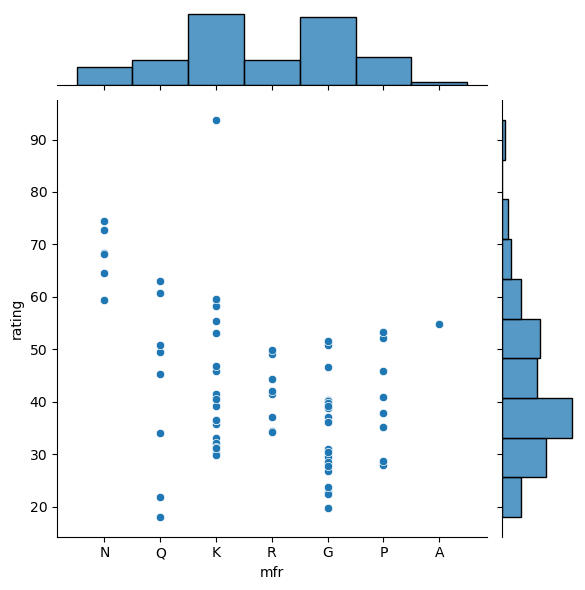

In [15]:
sns.jointplot(x='mfr',y='rating', data=cereals) # Create a joint plot of the ceral manufacturer vs the product rating

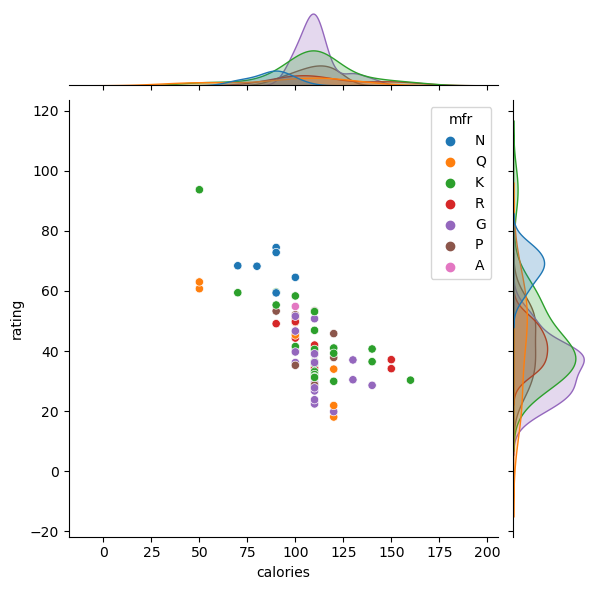

In [16]:
#Create a joint plot of the number of calories in each product vs its rating, differentiating each manufacture
sns.jointplot(x='calories',y='rating', data=cereals, hue = 'mfr') 

Text(0.5, 36.72222222222221, 'Sugar (g)')

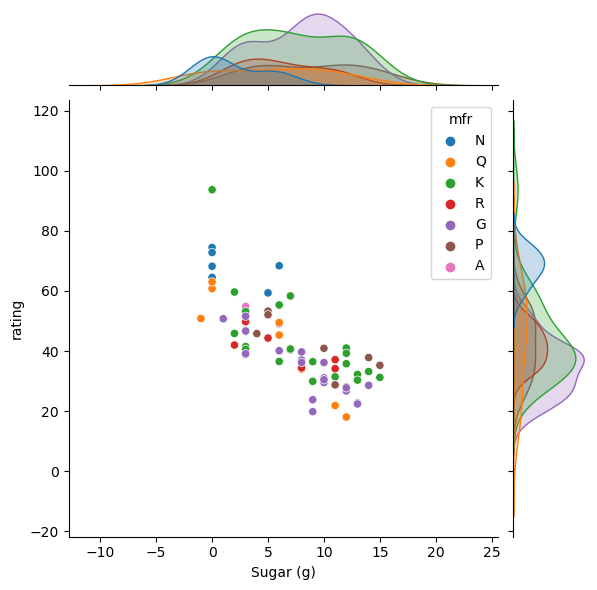

In [22]:
#Create a joint plot of the amount of sugar in each product vs its rating, differentiating each manufacture
ax = sns.jointplot(x='sugars',y='rating', data=cereals, hue = 'mfr')
ax.ax_joint.set_xlabel('Sugar (g)')

Text(0.5, 36.72222222222221, 'Percentage of FDA Recommended Vitamins (%)')

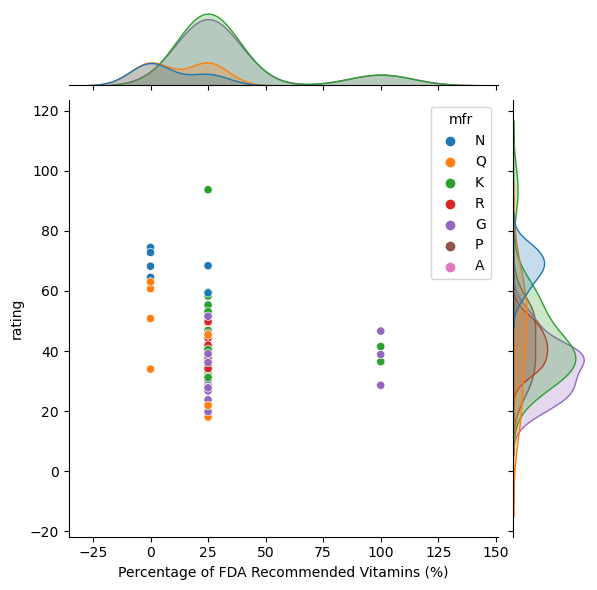

In [24]:
ax = sns.jointplot(x='vitamins',y='rating', data=cereals, hue = 'mfr')
ax.ax_joint.set_xlabel('Percentage of FDA Recommended Vitamins (%)')

**Explore all relationships across the entire data set using pairplot**

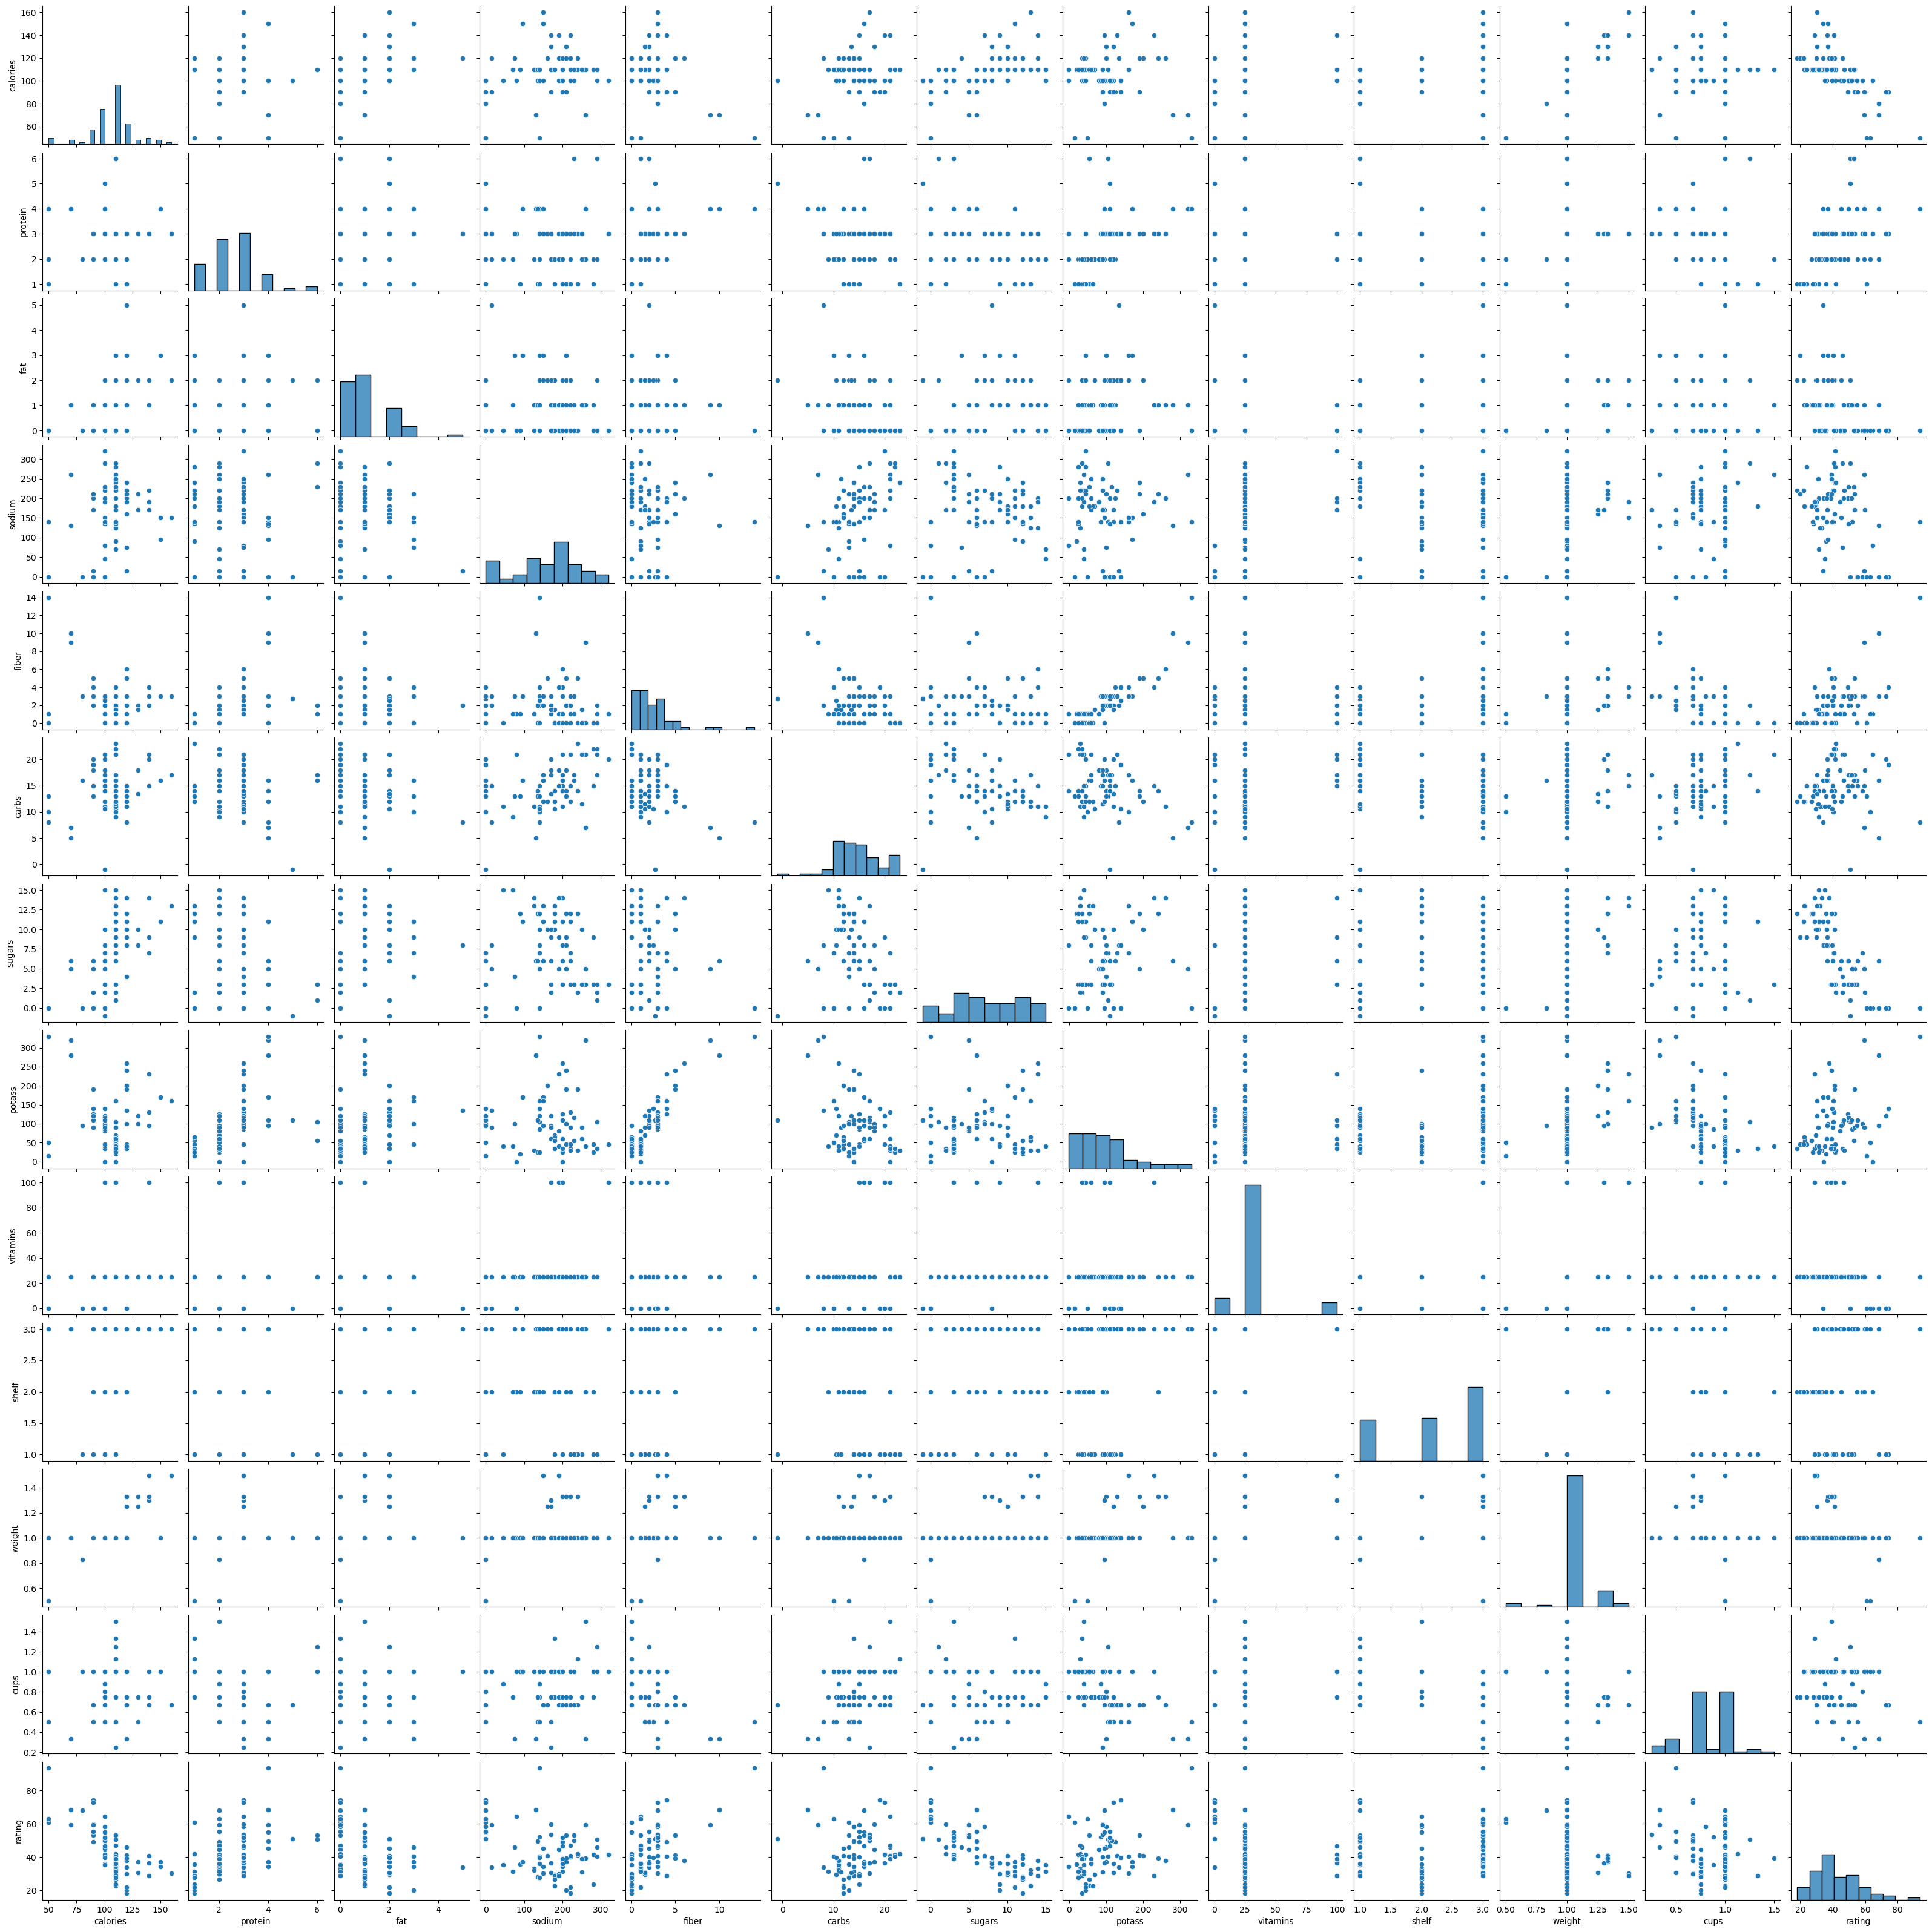

In [24]:
sns.pairplot(data=cereals)

**Based off this plot, the features most correlated with the product rating look to be calories, fiber and sugars**

**Lets create a linear model plot of  Rating vs. these features.**

<Axes: xlabel='calories', ylabel='rating'>

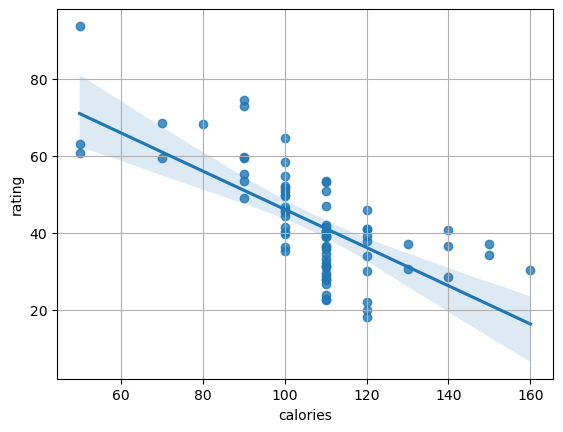

In [35]:
plt.grid()
sns.regplot(x='calories', y='rating', data=cereals,  scatter=True)

<Axes: xlabel='fiber', ylabel='rating'>

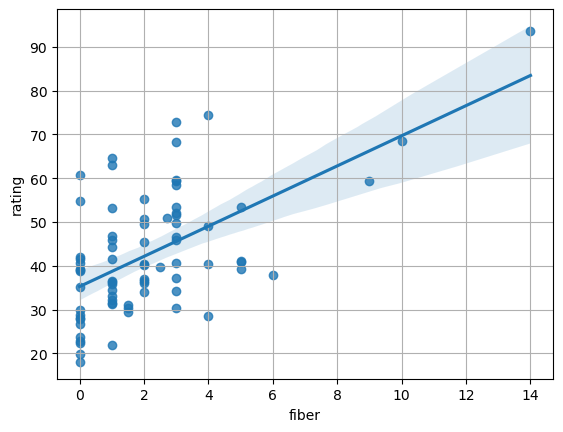

In [28]:
plt.grid()
sns.regplot(x='fiber', y='rating', data=cereals, scatter=True)

<Axes: xlabel='sugars', ylabel='rating'>

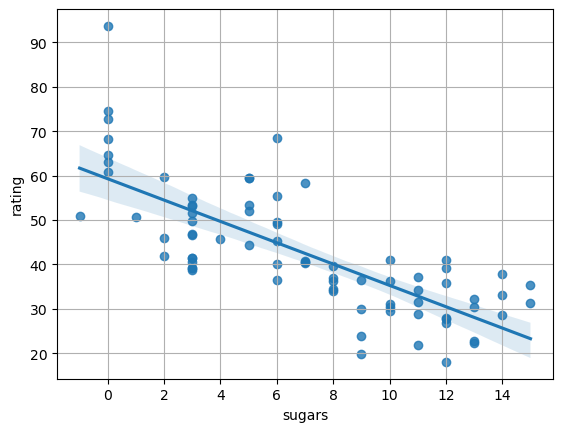

In [29]:
plt.grid()
sns.regplot(x='sugars', y='rating', data=cereals, scatter=True)

From these plots, the correlation between these features and the rating value become more clear:

* Calories - The higher the calorie count, the lower the rating.
* Fibre - The higher the fibre count, the higher the rating.
* Sugars - The higher the sugar count, the lower the rating.

**Now lets convert the non-numerical columns to numerical values by creating dummy variables to enable us to visualise their correlations with the product ratings.**

In [26]:
# Create a binary column for hot or cold serving, 1 = hot, 0 = cold.
hot = pd.get_dummies(cereals['type'], prefix='Hot', drop_first= True)
hot.head()

,Hot_H
0,0
1,0
2,0
3,0
4,0


In [28]:
# Create dummy variables for each manufacturer. A column with the value 1 represents the manufacturer of the cereal.
manufacturer = pd.get_dummies(cereals['mfr'])

In [29]:
#Combine the original dataframe with these dummy variable dataframes.
dummy_cereals = pd.concat([cereals,hot,manufacturer],axis=1)

In [30]:
dummy_cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbs,sugars,...,cups,rating,Hot_H,A,G,K,N,P,Q,R
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,...,0.33,68.402973,0,0,0,0,1,0,0,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,...,1.00,33.983679,0,0,0,0,0,0,1,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,...,0.33,59.425505,0,0,0,1,0,0,0,0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,...,0.50,93.704912,0,0,0,1,0,0,0,0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,...,0.75,34.384843,0,0,0,0,0,0,0,1


In [40]:
#Show the corelation between the manyfacturer and the rating of the cereal
corr = dummy_cereals.iloc[:, 15:].corr()
corr

,rating,Hot_H,A,G,K,N,P,Q,R
rating,1.000000,0.203024,0.100155,-0.370699,0.064196,0.527063,-0.025025,0.006107,-0.027393
Hot_H,0.203024,1.000000,0.569703,-0.127343,-0.131405,0.191854,-0.073251,0.151401,-0.068559
A,0.100155,0.569703,1.000000,-0.072548,-0.074862,-0.033346,-0.041731,-0.039058,-0.039058
G,-0.370699,-0.127343,-0.072548,1.000000,-0.412759,-0.183855,-0.230089,-0.215353,-0.215353
K,0.064196,-0.131405,-0.074862,-0.412759,1.000000,-0.189720,-0.237429,-0.222222,-0.222222
N,0.527063,0.191854,-0.033346,-0.183855,-0.189720,1.000000,-0.105758,-0.098984,-0.098984
P,-0.025025,-0.073251,-0.041731,-0.230089,-0.237429,-0.105758,1.000000,-0.123876,-0.123876
Q,0.006107,0.151401,-0.039058,-0.215353,-0.222222,-0.098984,-0.123876,1.000000,-0.115942
R,-0.027393,-0.068559,-0.039058,-0.215353,-0.222222,-0.098984,-0.123876,-0.115942,1.000000


<Axes: >

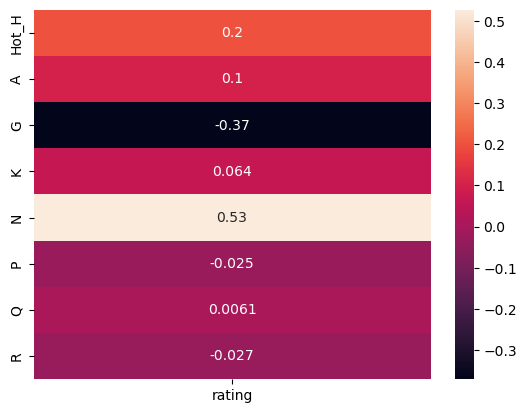

In [51]:
#Create a heatmap of th correclation to rating only
sns.heatmap(pd.DataFrame(corr.iloc[:,0])[1:], annot=True)

This heatmap shows manufacturer 'N' has the highest positve correlation to the rating value (i.e. it has more positive ratings), where as manufacturer 'G' has the highest negative correlation (i.e. it has more negative ratings).

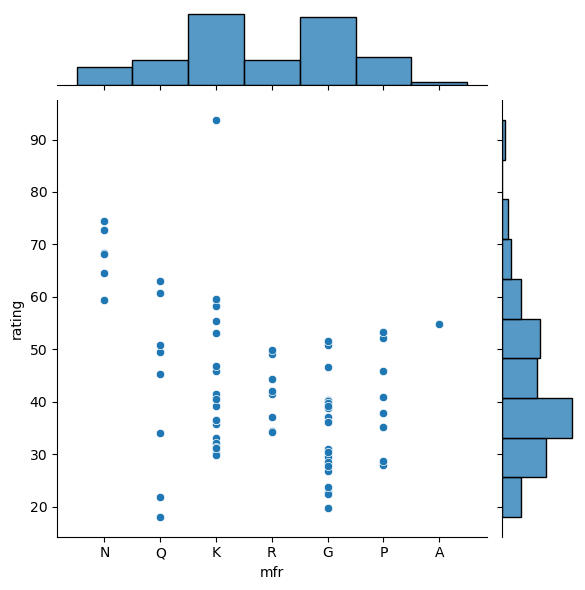

In [52]:
# Visualise this correlation with a pair plot
sns.jointplot(x='mfr',y='rating', data=cereals)

In [59]:
#Show the mean rating for each manufacturer and the standard devation of their ratings
cereals.groupby('mfr').agg({'rating': ['mean', 'std']})

rating           
          mean        std
mfr                      
A    54.850917        NaN
G    34.485852   8.946704
K    44.038462  14.457434
N    67.968567   5.509326
P    41.705744  10.047647
Q    42.915990  16.797673
R    41.542997   6.080841

## Setting up linear regression model

### Training and Testing Data

Now that we've explored the data, let's split the data into training and testing sets.
**Set a variable X equal to the numerical features of the cereals and a variable y equal to the "Rating" column.**

In [61]:
X = pd.concat([cereals[['calories', 'protein', 'fat', 
             'sodium', 'fiber', 'carbs', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']], hot, manufacturer], axis = 1)

X.head()

,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,shelf,weight,cups,Hot_H,A,G,K,N,P,Q,R
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0,0,0,0,1,0,0,0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,0,0,0,0,0,0,1,0
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,0,0,0,1,0,0,0,0
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,0,0,0,1,0,0,0,0
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,0,0,0,0,0,0,0,1


In [62]:
y = cereals['rating']
y.head()

0    68.402973
1    33.983679
2    59.425505
3    93.704912
4    34.384843
Name: rating, dtype: float64

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [67]:
lm.fit(X_train, y_train)

LinearRegression()

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [69]:
prediction = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values. **

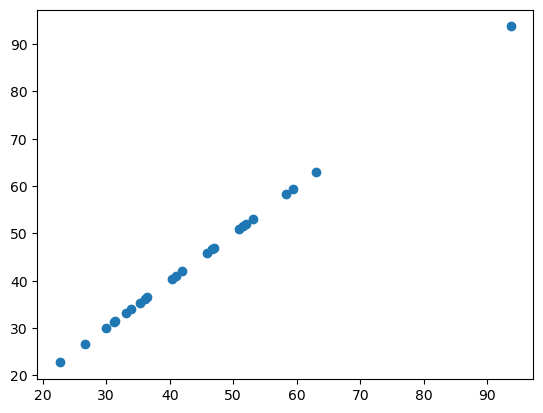

In [70]:
plt.scatter(y_test, prediction)

## Evaluating the Model

Let's evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [71]:
from sklearn import metrics

In [72]:
print('MAE: '+ str(metrics.mean_absolute_error(y_test, prediction)))
print('MSE: '+ str(metrics.mean_squared_error(y_test, prediction)))
print('RMSE: '+ str(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

MAE: 3.735338670966352e-07
MSE: 2.0678870653257147e-13
RMSE: 4.547402627133114e-07


This error evaluation of the model (predicted vs actual values) shows how accurate our model is after training. This degree of accuracy is very high (RMSE is x10-7), meaning we can now use this model to predict new rating values with a high level of confidence.

In [73]:
#Show how each column has an influence on the rating (i.e. 1 unit change causes x change in rating value)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
calories,-2.227242e-01
protein,3.273174e+00
fat,-1.691408e+00
sodium,-5.449270e-02
fiber,3.443480e+00
carbs,1.092451e+00
sugars,-7.248951e-01
potass,-3.399335e-02
vitamins,-5.121197e-02
shelf,-5.043659e-08


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 
The residuals show roughly follow a normal distribution, this shows our model has performed well overall.

/var/folders/mg/xxdyjdn14pn8mp173j13dv440000gn/T/ipykernel_4677/2906740500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction-y_test, bins=10, hist_kws=dict(edgecolor="grey", linewidth=1))


<Axes: xlabel='rating', ylabel='Density'>

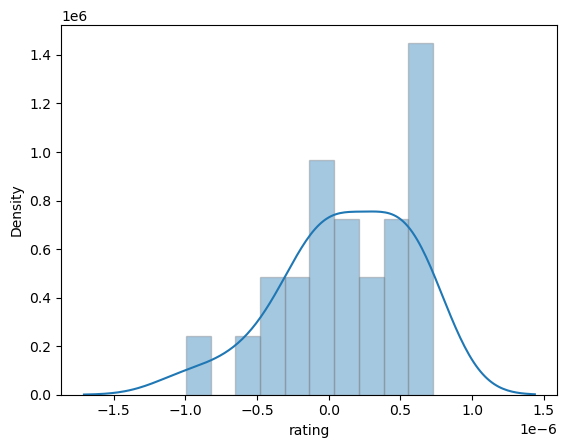

In [122]:
sns.distplot(prediction-y_test, bins=10, hist_kws=dict(edgecolor="grey", linewidth=1))

This residual plot indicates that, to be more confident with our model, we would need more data. The lack of data in some bins shows the affect of using a small dataframe to create our model. Ideally we would have recorded more ratings for different cereals, thus giving us a higher degree of accuracy in our model with a residual variance that follows a normal distibution more closely. 

## Prediction

**Making a prediction based of our model**

In [76]:
new_p = pd.DataFrame([(80, 6, 1, 100, 12, 6, 3, 200, 20, 3, 1,0.5, 0,0,0,1,0,0,0,0)], columns=X.columns)

In [77]:
new_p

,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,shelf,weight,cups,Hot_H,A,G,K,N,P,Q,R
0,80,6,1,100,12,6,3,200,20,3,1,0.5,0,0,0,1,0,0,0,0


In [83]:
#Predict a rating value for our new product
new_r = lm.predict(new_p)

print('Rating - '+ str(round(new_r[0], 2)))

Rating - 87.49
